# 6. Ordinary Differential Equations: Exercise Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

## 1. Linear ODEs
Like the exponential of a real number $x$ is given by
$$ e^{x} = 1 + x + \frac{1}{2} x^2 + \frac{1}{6} x^3 + ...
  = \sum_{k=0}^{\infty} \frac{1}{k!} x^k, $$
the *exponential of a matrix* $X$ is defined as
$$ e^{X} = I + X + \frac{1}{2} X^2 + \frac{1}{6} X^3 + ...
  = \sum_{k=0}^{\infty} \frac{1}{k!} X^k. $$

For one dimensional linear ODE
$$ \frac{dy}{dt} = a y $$
the solution is given by
$$ y(t) = e^{at} y(0), $$
where $y(0)$ is the initial state. 

For an $n$ dimensional linear ODE
$$ \frac{dy}{dt} = A y $$
where $A$ is an $n\times n$ matrix, the solution is given by the matrix exponential
$$ y(t) = e^{At} y(0), $$
where $y(0)$ is an $n$-dimensional initial state.

* Verify this by expanding $e^{At}$ accordint to the definition and differentiating each term by $t$.

The behavior of the matrix exponentioal $e^{At}$ depends on the eivenvalues of $A$; whether the eigenvalues are real or complex, and whether the real part is positive or negative.

Let us visualize solutions for different eigenvalues.

In [2]:
def linear(y, t, A):
    """Linear dynamcal system dy/dt = Ay
    y: n-dimensional state vector
    t: time (not used, for compatibility with odeint())
    A: n*n matrix"""
    # y is an array (row vector), A is a matrix
    return A@y

In [3]:
def linear2D(A, yinit=np.array([[1,0],[0,1],[-1,0],[0,-1]]), t=np.arange(0, 5, 0.1)):
    """Visualizing linear 2D dynamical system"""
    for y0 in yinit:
        y = odeint(linear, y0, t, args=(A,))
        plt.plot(y[0,0], y[0,1], 'o')   # starting point
        plt.plot(y[:,0], y[:,1], '+-')  # trajectory
    plt.axis('equal')
    return np.linalg.eig(A)

1) Real eigenvalues $\lambda_1 > \lambda_2 > 0$

(array([2.3660254, 0.6339746]),
 array([[ 0.9390708 , -0.59069049],
        [ 0.34372377,  0.80689822]]))

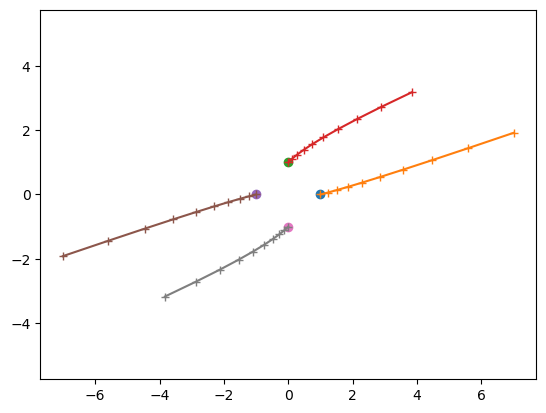

In [4]:
A = np.array([[2, 1], [0.5, 1]])  # modift this!
linear2D(A, t=np.arange(0, 1, 0.1))

2) Real eigenvalues $\lambda_1 > 0 > \lambda_2$

(array([ 2.1583124, -1.1583124]),
 array([[ 0.98769933, -0.30185542],
        [ 0.15636505,  0.95335371]]))

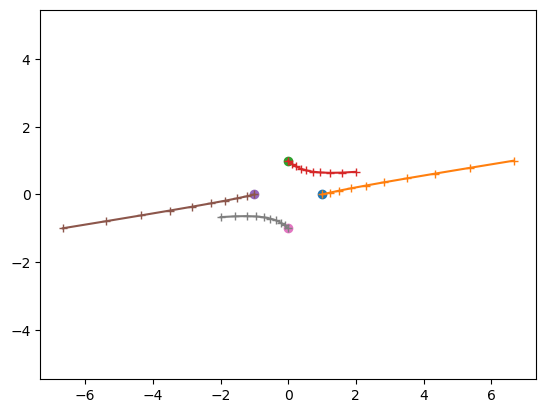

In [5]:
A = np.array([[2, 1], [0.5, -1]])
linear2D(A, t=np.arange(0, 1, 0.1))

3) Real eigenvalues $0 > \lambda_1 > \lambda_2$

(array([-2.3660254, -0.6339746]),
 array([[-0.9390708 , -0.59069049],
        [ 0.34372377, -0.80689822]]))

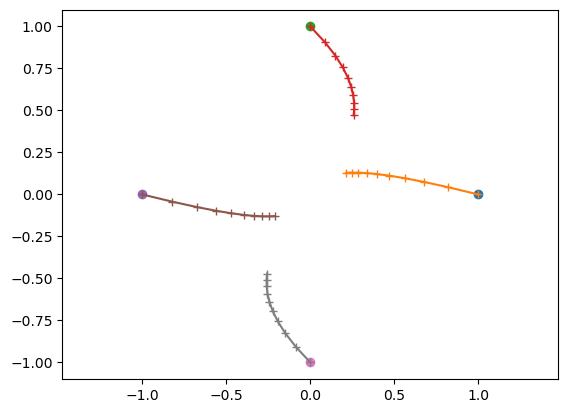

In [6]:
A = np.array([[-2, 1], [0.5, -1]])
linear2D(A, t=np.arange(0, 1, 0.1))

4) Complex eigenvalues $\lambda_1=a+ib$ and $\lambda_2=a-ib$ with $a>0$

(array([1.5+1.32287566j, 1.5-1.32287566j]),
 array([[ 0.81649658+0.j        ,  0.81649658-0.j        ],
        [-0.20412415+0.54006172j, -0.20412415-0.54006172j]]))

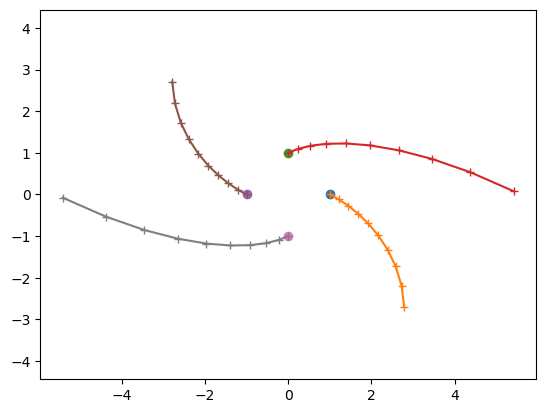

In [7]:
A = np.array([[2, 2], [-1, 1]])
linear2D(A, t=np.arange(0, 1, 0.1))

5) Complex eigenvalues $\lambda_1=a+ib$ and $\lambda_2=a-ib$ with $a<0$

(array([-1.5+0.8660254j, -1.5-0.8660254j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.35355339+0.61237244j, 0.35355339-0.61237244j]]))

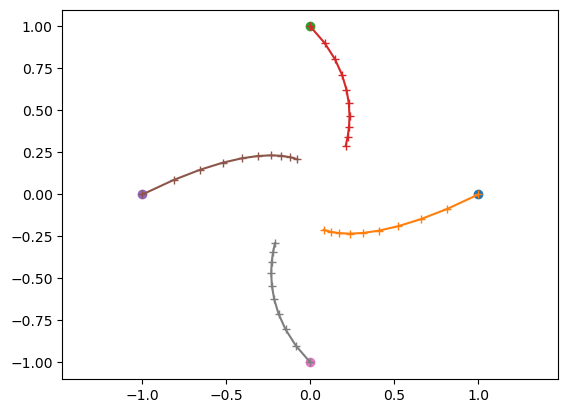

In [8]:
A = np.array([[-2, 1], [-1, -1]])
linear2D(A, t=np.arange(0, 1, 0.1))

c.f. For a 2 by 2 matrix
$$ A = \pmatrix{a & b \\ c & d}, $$
we can analytically derive the eivenvalues from 
$$ \det (A - \lambda I) = (a-\lambda)(d-\lambda) - bc = 0 $$
as
$$ \lambda = \frac{a+d}{2} \pm \sqrt{\frac{(a-d)^2}{4}+ bc}. $$

## 2. Nonlinear ODEs
1) Implement a nonlinear system, such as a pendulum with friction $\mu$:
$$ \frac{d\theta}{dt} = \omega $$
$$ ml^2 \frac{d\omega}{dt} = - \mu \omega - mgl \sin \theta $$

In [9]:
def pendulum(y, t, m=1, l=1, mu=0.1, g=9.8):
    th, om = y
    dthdt = om
    domdt = -(mu*om + m*g*l*np.sin(th))/(m*l*l)
    return [dthdt, domdt]

2) Run a simulation by `odeint()` and show the trajectory as (t, y(t))

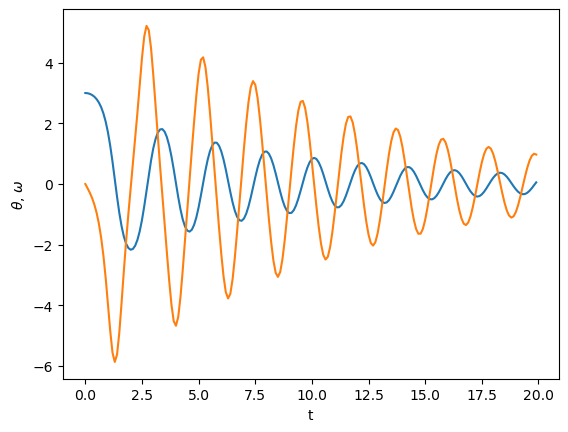

In [10]:
y0 = np.array([3, 0])
t = np.arange(0, 20, 0.1)
y = odeint(pendulum, y0, t, args=(1, 1, 0.2, 9.8))
plt.plot(t, y)  # trajectory
plt.xlabel('t'); plt.ylabel('$\\theta$, $\omega$');

3) Show the trajectory in the 2D state space $(\theta, \omega)$

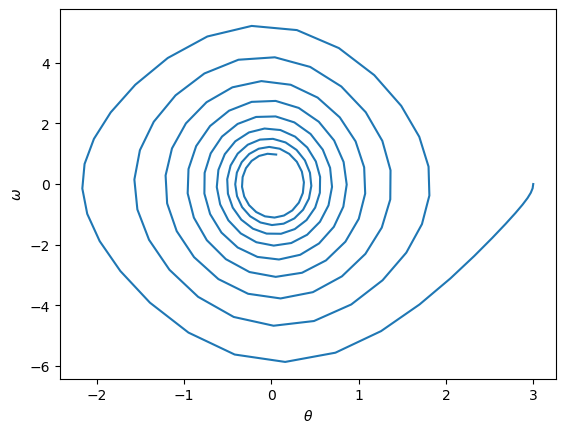

In [11]:
plt.plot(y[:,0], y[:,1]);  # phase plot
plt.xlabel('$\\theta$'); plt.ylabel('$\omega$');

Option) Implement a nonlinear system with time-dependent input, such as a forced pendulum:
$$ \frac{d\theta}{dt} = \omega $$
$$ ml^2 \frac{d\omega}{dt} = - \mu \omega - mgl \sin\theta + a\sin bt$$
and see how the behavior changes with the input.

## 3. Bifurcation
FitzHugh-Nagumo model is an extension of Van der Pol model to approximate spiking behaviors of neurons.
$$ \frac{dv}{dt} = v - \frac{v^3}{3} - w + I $$
$$ \frac{dw}{dt} = \phi (v + a - bw) $$
1) Implement a function and see how the behaviors at different input current $I$.

In [12]:
def fhn(y, t, I=0, a=0.7, b=0.8, phi=0.08):
    """FitzHugh-Nagumo model"""
    v, w = y
    dvdt = v - v**3/3 - w + I
    dwdt = phi*(v + a -b*w)
    return np.array([dvdt, dwdt])

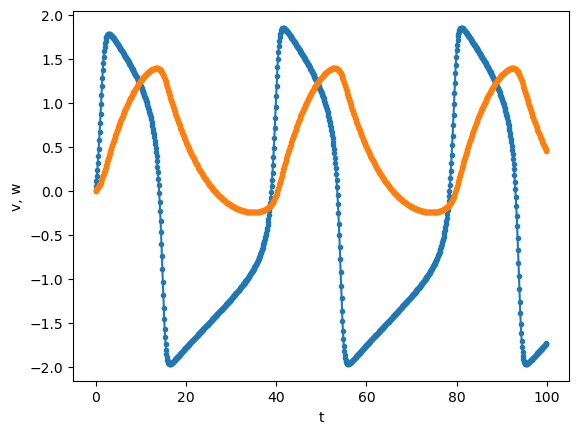

In [13]:
y0 = np.array([0, 0])
t = np.arange(0, 100, 0.1)
y = odeint(fhn, y0, t, args=(0.5,))
plt.plot(t, y, '.-')  # trajectory
plt.xlabel('t'); plt.ylabel('v, w');

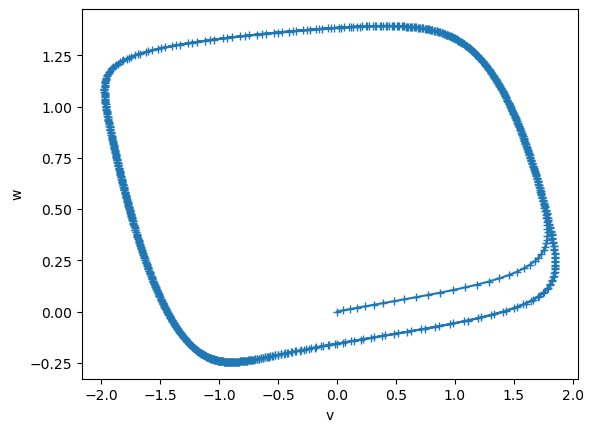

In [14]:
plt.plot(y[:,0], y[:,1], '+-')  # phase plot
plt.xlabel('v'); plt.ylabel('w');

2) Draw a *bifurcation diagram* showing the max-min of $v$ for different values of $I$.

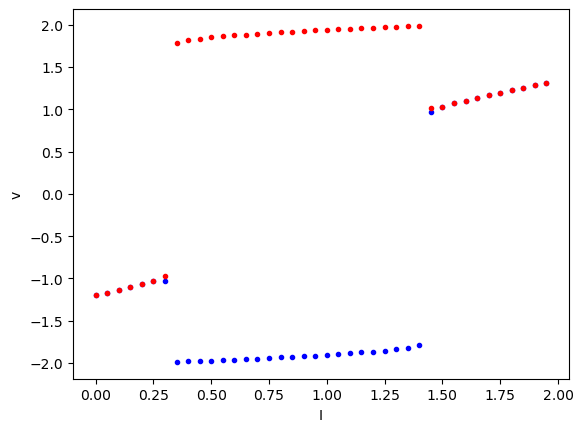

In [15]:
# bifurcation diagram
t = np.arange(0, 200, 0.1)
for I in np.arange(0., 2., 0.05):
    y = odeint(fhn, y0, t, args=(I,))  # change I
    plt.plot(I, min(y[1000:,0]), "b.")
    plt.plot(I, max(y[1000:,0]), "r.")
plt.xlabel('I'); plt.ylabel('v');